# Step by step sample run of OAC from AerMAPS CSV output (currently only for CO2)
- Reading the csv file to generating a readable matrix.
- Generating the desired TOML file
- Running OAC

In [13]:
import xarray as xr
from Generating_nc_files import scaled_emissions_to_nc
from import_csv import csv_to_matrix, matrix_to_co2, csv_to_matrix_weighted
from gen_toml import generate_toml
from openairclim import oac

In [14]:
csv_to_matrix("aviation_emissions_data.csv")

array([['Years', 'CO2 emissions', 'Nox emissions', ..., 'Soot emissions',
        'Sulfur emissions', 'Distance'],
       ['1940', '35135888054.4648', '136301461.808086', ...,
        '0.000270082156819193', '0.0108032862727677', '745392399.950127'],
       ['1941', '37952826350.5366', '147229115.237041', ...,
        '0.000291735367048298', '0.0116694146819319', '805152506.020751'],
       ...,
       ['2098', '7981561535523.12', '30962601631.603', ...,
        '0.0613525791907589', '2.45410316763035', '500822887802.026'],
       ['2099', '8220999208963.82', '31891444097.4972', ...,
        '0.063193086058449', '2.52772344233796', '515847016600.566'],
       ['2100', '8467619495227.15', '32848149830.3113', ...,
        '0.0650888041551744', '2.60355216620698', '531321837796.702']],
      shape=(162, 7), dtype='<U20')

In [15]:
matrix_to_co2("aviation_emissions_data.csv", 2020, 2025, 1)

Saved scaled emissions to inputs/mat_generated_nc_2020.nc
Saved scaled emissions to inputs/mat_generated_nc_2021.nc
Saved scaled emissions to inputs/mat_generated_nc_2022.nc
Saved scaled emissions to inputs/mat_generated_nc_2023.nc
Saved scaled emissions to inputs/mat_generated_nc_2024.nc


In [16]:
generate_toml(2020, 2025, 1, "gen_2020_2025_1.toml")

TOML file written to gen_2020_2025_1.toml


read_config ln. 254 in check_against_template INFO: Get default value for: responses CO2 rf method 
read_config ln. 254 in check_against_template INFO: Get default value for: responses cont method 
read_config ln. 520 in check_metrics_time ERROR: Metrics time settings with t_0 = 2020 and H = 6 are outside defined time range.
read_config ln. 185 in check_config ERROR: Configuration is not valid.
read_config ln. 376 in create_output_dir INFO: Create new output directory results/
read_netcdf ln. 173 in open_inventories INFO: Emission inventories openend, attribute sections and time constraints checked successfully.
read_netcdf ln. 220 in split_inventory_by_aircraft WARNING: No ac coordinate found in emission inventory for year 2020.0. Reverting to 'DEFAULT' aircraft from config file.
read_netcdf ln. 220 in split_inventory_by_aircraft WARNING: No ac coordinate found in emission inventory for year 2021.0. Reverting to 'DEFAULT' aircraft from config file.
read_netcdf ln. 220 in split_invento

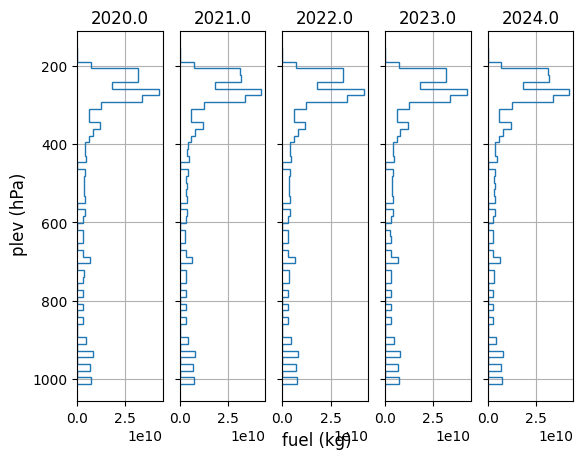

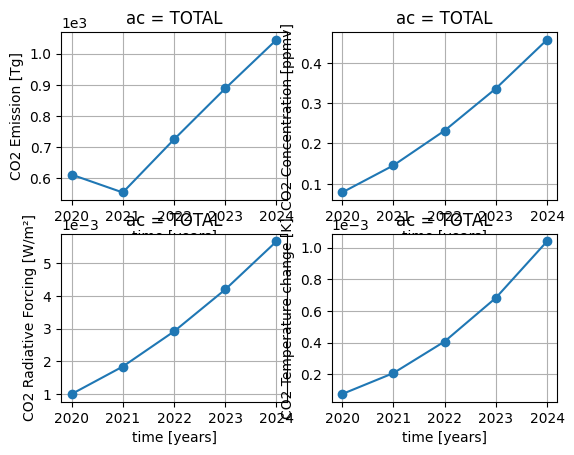

In [17]:
oac.run("tomls/gen_2020_2025_1.toml")

In [18]:
results_ds_1 = xr.load_dataset("results/gen_2000s.nc")
results_ds_2 = xr.load_dataset("results/gen_2000s_metrics.nc")
display(results_ds_1)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/Users/abhigyanprakash/Desktop/supaero skool stuff/Research project/prelim code work for OAC/results/gen_2000s.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [21]:
display(results_ds_2)

<xarray.Dataset> Size: 64B
Dimensions:       (species: 2)
Coordinates:
  * species       (species) <U5 40B 'CO2' 'total'
Data variables:
    AGWP_51_2000  (species) float32 8B 1.483 1.483
    ATR_51_2000   (species) float32 8B 0.02028 0.02028
    AGTP_51_2000  (species) float32 8B 0.0 0.0
Attributes:
    Title:    gen_2000s climate metrics

In [ ]:
ac = "TOTAL"
dt = results_ds_1.dT_CO2.sel(ac=ac)
agwp = results_ds_2.AGWP_51_2000



/var/folders/dn/64_sl8rj5zj6gzgcs1cnj0n00000gn/T/ipykernel_84813/3794806036.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


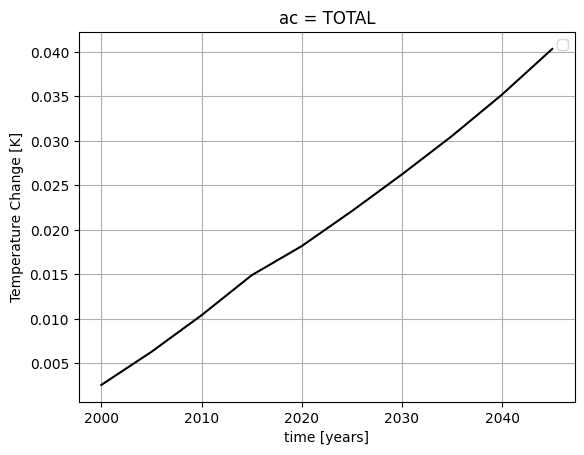

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.grid(True)

dt.plot(ax=ax, color="k")
ax.set_ylabel("Temperature Change [K]")
ax.legend()